# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 6. Поиск эволюционирующих шаблонов с помощью матричного профиля ряда.**

In [1]:
%load_ext autoreload
%autoreload 2
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/29/d4/1244ab8edf173a10fd601f7e13b9566c1b525c4f365d6bee918e68381889/pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/a6/ab/7e5f53c3b9d14972843a647d8d7a853969a58aecc7559cb3267302c94774/tzdata-2024.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 653.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.5 MB 871.5 kB/s eta 0:00:14
    --------------------------------------- 0.2/11.5 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.3/11.5 MB 1.8 MB/s eta 0:00


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## **Часть 1.** Поиск цепочек временного ряда.

Импорт библиотек и модулей

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
from sklearn.metrics import mean_squared_error

В первом задании вам предстоит выполнить поиск эволюционирующих шаблонов временного ряда. Выполните считывание набора данных [Rotation Matrix](datasets/Rotation%20Matrix.txt), найдите в нем самую длинную цепочку и выведите индексы начала звеньев этой цепочки.

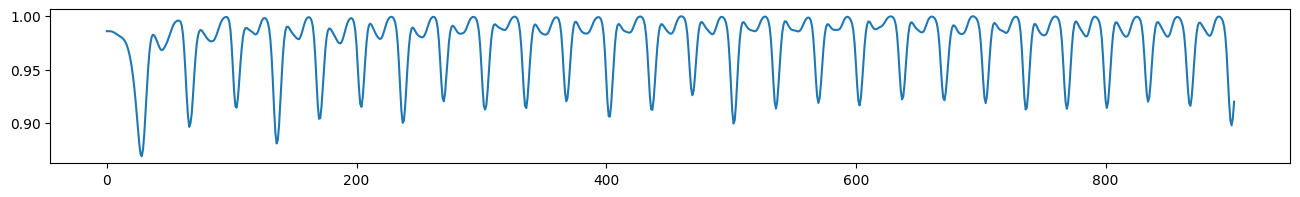

In [3]:
fig, ax = plt.subplots(figsize=(16, 2))
ts = np.loadtxt('datasets/Rotation Matrix.txt')
ax.plot(ts)

In [10]:
# INSERT YOUR CODE
m = 50
mp = stumpy.stump(ts, m=m)
# mp[:, 2] и mp[:, 3] представляют расстояния и индексы начала шаблонов
all_chain_set, chain = stumpy.allc(mp[:, 2], mp[:, 3])
chain

array([ 16,  55, 124, 490, 524, 591])

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Цепочка состоит из 6 звеньев

## **Часть 2. Визуализация цепочек**

Выполните визуализацию найденных в прошлом задании цепочек: постройте график временного ряда, на котором выделены звенья цепочек. Также постройте график, на котором изображены только сами звенья.

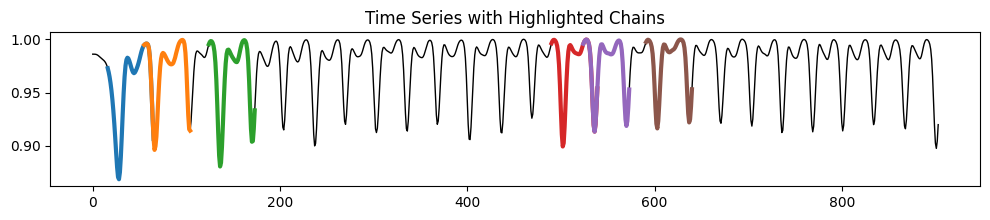

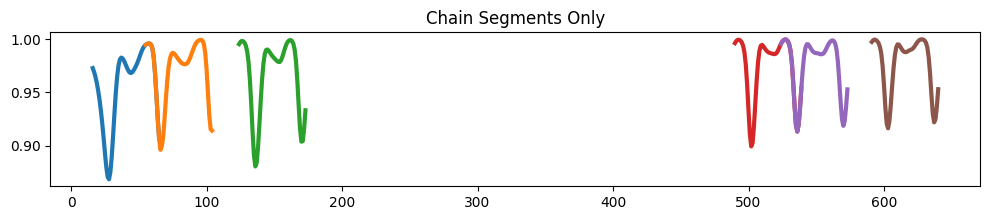

In [15]:
# INSERT YOUR CODE
fig, ax = plt.subplots(figsize=(12, 2))
ax.plot(ts, linewidth=1, color='black')
for i in range(chain.shape[0]):
    y = ts[chain[i]:chain[i]+m]
    x = range(chain[i], chain[i]+m)
    plt.plot(x, y, linewidth=3)

plt.title('Time Series with Highlighted Chains')
plt.show()

fig, ax = plt.subplots(figsize=(12, 2))
for i in range(chain.shape[0]):
    y = ts[chain[i]:chain[i]+m]
    x = range(chain[i], chain[i]+m)
    plt.plot(x, y, linewidth=3)
    
plt.title('Chain Segments Only')
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Звенья имеют схожую форму, но разный размер

## **Часть 3.** Предсказывание значений ряда на основе цепочек.

Предскажите значения последнего звена цепочки, вычислив разность между двумя предыдущими звеньями цепочки. Сравните полученное предсказание с истинным значением.

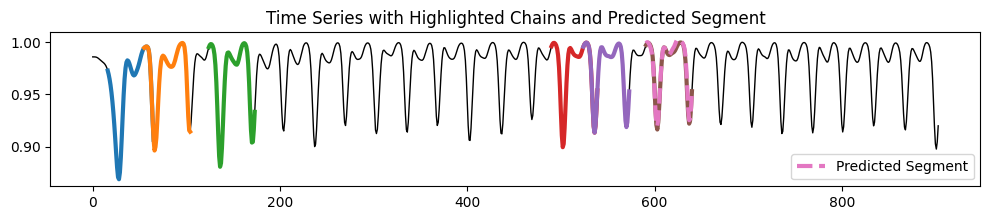

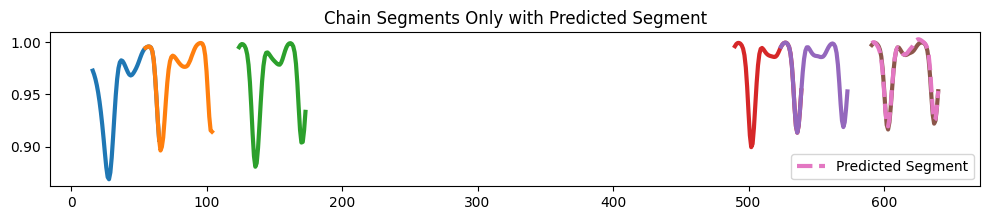

In [21]:
# INSERT YOUR CODE
if len(chain) > 2:
    # Два последних индекса
    last_two_indices = chain[-2:]

    # Извлекаем последние два звена
    segment1 = ts[last_two_indices[0]:last_two_indices[0] + m]
    segment2 = ts[last_two_indices[1]:last_two_indices[1] + m]

    # Предсказание для следующего сегмента, используя разницу
    prediction = segment2 + (segment2 - segment1)  # Предсказание: разница между последними звеньями

    # Истинное значение последнего звена (следующий сегмент)
    true_segment = ts[chain[-1]:chain[-1] + m]

    fig, ax = plt.subplots(figsize=(12, 2))
    ax.plot(ts, linewidth=1, color='black')  # Весь временной ряд
    for i in range(chain.shape[0]):
        y = ts[chain[i]:chain[i]+m]
        x = range(chain[i], chain[i]+m)
        ax.plot(x, y, linewidth=3)  # Цепочки на фоне временного ряда
    ax.plot(range(last_two_indices[1], last_two_indices[1] + m), prediction, 
            label="Predicted Segment", linestyle='--', linewidth=3)
    ax.set_title("Time Series with Highlighted Chains and Predicted Segment")
    ax.legend()
    plt.show()

    # График, показывающий только звенья цепочек и предсказанный сегмент
    fig, ax = plt.subplots(figsize=(12, 2))
    for i in range(chain.shape[0]):
        y = ts[chain[i]:chain[i]+m]
        x = range(chain[i], chain[i]+m)
        ax.plot(x, y, linewidth=3)  # Только звенья цепочек
    ax.plot(range(last_two_indices[1], last_two_indices[1] + m), prediction, 
            label="Predicted Segment", linestyle='--', linewidth=3)
    ax.set_title("Chain Segments Only with Predicted Segment")
    ax.legend()
    plt.show()
else:
    print("Not enough segments to make a prediction.")

❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Предсказание совпало по форме и местоположению